# McCabe-Thiele method for distillation column design

The [McCabe-Thiele](https://www.brewiki.org/distillation-column/distillation-column-design.html) approach provides a simple graphical method for determining the number of theoretical stages required to achieve the desired separation of a binary mixture. It assumes that the column will be operating at constant pressure and with constant molal overflow (CMO), which implies:

* Molal heats of vaporisation of the components are roughly the same.

* Heat effects (heats of solution, heat losses to and from column, etc.) are negligible.

* For every mole of vapour condensed, one mole of liquid is vaporised.

In some cases, the assumption of constant mass overflow may be valid (instead of CMO). This will be possible if the first condition holds true on a mass basis rather than a molar bases.

[The assumption of constant molar overflow is not limiting](https://chempedia.info/info/distillation_constant_molar_overflow/) since in very few systems do the molar heats of vaporisation differ by more than 10 per cent. The method does have limitations, however, and should not be employed when the relative volatility is less than 1.3 or greater than 5, when the reflux ratio is less than 1.1 times the minimum, or when more than twenty-five theoretical trays are required. In these circumstances, the Ponchon-Savarit method described in could be used.


## Required Libraries
___

In [ ]:
import numpy as np
from sympy import Symbol, Eq, solve #to determine intercept with vle plot for stages
from ipywidgets import interactive, fixed,FloatSlider, Box, Layout
import matplotlib.pyplot as plt
from math import isclose

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

## Design Procedure
___

<p align = justify>Given the VLE (Vapor Liquid Equilibrium) data of a binary mixture. The operating lines of the rectification (top) and stripping (bottom) sections can be drawn. These lines define the mass balances between the vapor and liquid phases in each section of the column. The use of the constant molar overflow assumption ensures that the operating lines are straight lines (i.e. constant slope). Once the operating lines for the top and bottom of the column have been constructed, the theoretical stages and feed line for the column can be constructed. Stages are determined by drawing steps between the operating lines and the  systems VLE curve. These steps are drawn from the specified distillate composition to the bottom composition or vice versa.</p>

<p align = justify>In the above method the stages of the column are determined after the operating lines of the bottom and top section are drawn, this can also be done by specifying the feed-line of the of system in conjuntion with one operating line.</p>

Only one pair of lines (exculding the VLE curve) is required to determine the number of theoretical stages, as follows:

* feed-line and rectification section operating line

* feed-line and stripping section operating line

* stripping and rectification operating lines

This is because each pair of lines can be used to construct the third.

##  Example
___

Using a [Benzene-Toluene](http://www.vaxasoftware.com/doc_eduen/qui/vle_en.pdf) system as an example:

| Benzene-Toluene |@ 101.325kPa|
| :---: |:---:|
|Benzene mol fraction ||
| Liquid | Vapor |
|0.00|0.00|
|0.02|0.05|
|0.06|0.13|
|0.10|0.21|
|0.14|0.28|
|0.18|0.34|
|0.22|0.40|
|0.26|0.46|
|0.30|0.51|
|0.34|0.56|
|0.42|0.64|
|0.46|0.68|
|0.50|0.71|
|0.54|0.75|
|0.58|0.78|
|0.62|0.81|
|0.66|0.83|
|0.70|0.85|
|0.74|0.88|
|0.78|0.90|
|0.82|0.92|
|0.86|0.94|
|0.94|0.98|
|1.00|1.00|


The molecules of benzene and toluene are similar in molecular weight (78.1 g/mol for benzene and 92.1 g/mol for toluene) and structure, with only dispersion forces acting between molecules in the mixture. Furthermore, both components have similar molar heat of vaporisation values ([33.8kJ/mol](https://www.engineeringtoolbox.com/benzene-benzol-properties-d_2053.html) for benzene and [38.0 kJ/mol](https://www.engineeringtoolbox.com/toluene-methylbenzene-properties-d_2095.html) for toluene). Therefore, the assumption of constant molal overflow holds for this system.

## Plotting function
___

In [ ]:
#Function to plot graph throughout
def plot_mt(vle_x,vle_y,title = '',caption='',x_D = 0,R=0,x_B=0,L_V=0,x_F = 0,plot_stages = False,summary = False):
  """Plots MacCabe-Thiele graph
  
  
  vle_x: liquid phase VLE data (int|float)
  vle_y: vapor phase VLE data (int|float)
  title: Plot title  (str)
  caption: Plot caption  (str)
  x_D: distillate composition (int|float)
  R: reflux ratio (int|float)
  x_B: bottom composition (int|float)
  L_V: Liquid/Vapor in the stripping section (int|float)
  x_F: feed composition (int|float)
  plot_stages: plot theoretical stages if true (bool)
  summary: print summary if true (bool)
  
  
  
  """


  #setting axis-margin and annotation x/y offset
  plt.margins(0)
  ANOT_Y = 0.003
  ANOT_X = 0.001

  #plotting vle data
  plt.plot(vle_x,vle_y,label = 'VLE')

  #plotting x = y
  plt.plot([x for x in range(2)],[y for y in range(2)],color = 'black', label = 'x=y')

  #-------------------------------------------------------------------------------------------
  #Plotting operating lines

  #rectification section  constants
  md = R/(R+1)
  cd = x_D - md*x_D # c = y - mx

  #stripping section constants
  mb = L_V
  cb = x_B - mb*x_B # c = y - mx

  #intersection point between operating lines
  # x = c2 - c1/ (m1 - m2)
  if all([cb,cd,md,mb]) != 0:
    intersection = (cb - cd) / (md - mb)
    #limiting operating lines to intersection if both operating lines are present
    rec_x1 = intersection
    rec_y1 = md*intersection + cd

    strip_x2 = intersection
    strip_y2 = mb*intersection + cb
  else:

    rec_x1 = 0
    rec_y1 = cd

    strip_x2 = x_D
    strip_y2 = mb*x_D + cb

  if x_D and R:
    #plotting x_D (desired top composition)
    top_color = 'green'
    plt.plot([x_D,x_D],[0,x_D],'--',label='$x_D$', color = top_color)
    plt.annotate('$x_D$',(x_D,0),xytext = (x_D + ANOT_X,ANOT_Y),annotation_clip=False)

    #Plotting Rectification section operating line
    plt.plot([rec_x1,x_D],[rec_y1,x_D], label = 'operating line(rectification section)', color = top_color)

  if x_B and L_V:
    #plotting x_B (desired bottom composition)
    bot_color = 'purple'
    plt.plot([x_B,x_B],[0,x_B],'--',label='$x_B$',color = bot_color)
    plt.annotate('$x_B$',(x_B,0),xytext = (x_B + ANOT_X,ANOT_Y),annotation_clip=False)

    #Plotting Stripping section operating line
    # y = mx + c where m is the slope
    plt.plot([x_B,strip_x2],[x_B,strip_y2], label = 'operating line(stripping section)',color = bot_color)

  #-------------------------------------------------------------------------------------------
  ##Plotting feed line

  if x_F:
    plt.plot([x_F,x_F],[0,x_F],'--', color = 'grey',label = '$x_F$')
    plt.annotate('$x_F$',(x_F,0),xytext = (x_F + ANOT_X,ANOT_Y),annotation_clip=False)

    if all([cb,cd,md,mb]) != 0:
      y_r = 'md*x + cd'
      var_r = {'md':md,'cd':cd}
      plt.plot([x_F,intersection],[x_F,eval(y_r,var_r,{'x':intersection})], color = 'grey', label = 'q-line')

  #------------------------------------------------------------------------------------------
  ##Plotting stages
  
  if all([cb,cd,md,mb]) != 0 and plot_stages:

    #Determining equation for VLE data by fitting a cubic polynomial
    coefficients = np.polyfit(vle_x,vle_y,3)
    y_vle = np.poly1d(coefficients) #equation


    #Rectification section operating line equation
    y_r = 'md*x + cd'
    var_r = {'md':md,'cd':cd}

    #Stripping section operating line equation
    y_s = 'mb*x + cb'
    var_s = {'mb':mb,'cb':cb}


    #finding pinch point
    x = Symbol('x',real = True, positive = True)
    y_int = eval(y_r,var_r,{'x':intersection}) #y at intersection
    vle_at_int = y_vle[3]*intersection**3 + y_vle[2]*intersection**2 + y_vle[1]*intersection + y_vle[0] #vle curve val at current intersection

    sol = solve(Eq(y_vle[3]*x**3 + y_vle[2]*x**2 + y_vle[1]*x + y_vle[0] - y_int, 0), x) #point at which intersection is on vle curve
    
    #checking if intersection at or above vle curve
    if isclose(sol[0], intersection, abs_tol = 0.01) or y_int > vle_at_int:
      print('Approximately infinite stages(pinch point)')
      summary = False
      return


    #initializing variables for while loop
    feed_stage = 0
    x_step = x_D    #Begining plot at x_D
    step_lines = [] #storing line segments
    y_vert = x_D    #initialsing y_vert to be used in sol

    while x_step > x_B:

      ####  horizontal lines  ####

      #Determinig intercept of horizontal line with VLE plot
      x = Symbol('x',real = True, positive = True)
      sol = solve(Eq(y_vle[3]*x**3 + y_vle[2]*x**2 + y_vle[1]*x + y_vle[0] - y_vert, 0), x)

      if len(sol) > 1:
        print('Multiple solutions found for intercept with VLE plot')
        break
      if len(sol) == 0:
        print('Multiple solutions found for intercept with VLE plot')
        break

      #storing line segment
      x_hori = sol[0]

      #y-values will be different for rectifying and stripping sections
      if x_step <= intersection:
        y_hori = eval(y_s,var_s,{'x':x_step})
      else:
        feed_stage += 1
        y_hori = eval(y_r,var_r,{'x':x_step})

      step_lines.append(
                          {'x':[x_step,x_hori],
                          'y':[y_hori,y_hori]
                          }
                        )
      
      #next x_step will be at x_hori(i.e. intercept with VLE plot)
      x_step = x_hori

      ####  Vertical lines  ####

      #one point of the vert line will be previous x_hori,y_hori (point on VLE plot)

      #y-value will be different for rectifying and stripping sections
      if x_step <= intersection:
        y_vert = eval(y_s,var_s,{'x':x_step})
      else:
        y_vert = eval(y_r,var_r,{'x':x_step}) 

      step_lines.append(
                          {'x':[x_step,x_step],
                          'y':[y_hori,y_vert]
                          }
                        )
      
      #next x_step will be the same

    stage_counter = 0
  
    #Print line segments
    for i in range(len(step_lines)):
      if step_lines[i]['y'][0] < step_lines[i]['x'][0]:
        
        step_lines[i]['y'][0] = step_lines[i]['x'][0]

      elif step_lines[i]['y'][1] < step_lines[i]['x'][1]:
        
        step_lines[i]['y'][1] = step_lines[i]['x'][1]

      if i%2 == 0:
        stage_counter += 1
        plt.annotate(stage_counter,(step_lines[i]['x'][1],step_lines[i]['y'][1]),
                     xytext = (step_lines[i]['x'][1] - ANOT_X - 0.008, step_lines[i]['y'][1] + ANOT_Y + 0.009),
                     annotation_clip=False
                     )
      
        


      plt.plot(step_lines[i]['x'],step_lines[i]['y'], color = 'red')
      
    # #exact number of trays
    # if x_step < x_B:
    #   a = step_lines[-2]['x'][0] - x_B
    #   A = abs(step_lines[-2]['x'][0] - step_lines[-2]['x'][1])
    #   num_trays = (len(step_lines)//2) - 2 + a/A  #-2 for reboiler and stage after x_B



    #print statements
    if summary == True:
      print(f'Approximately {len(step_lines)//2} ideal stages including the partial reboiler.')
      print(f'Ideal feed stage = {feed_stage}')
      print(f'For the feed to be a saturated liquid, feed needs to have x_F = {intersection:.2f}.')
      # print(f'Assuming the column operates with a partial-reboiler and total condenser, total number of trays required = {num_trays}')
      
  #-------------------------------------------------------------------------------------------

  plt.title(title)
  plt.legend()
  plt.xlabel('LIQUID(mol/mol)')
  plt.ylabel('VAPOR(mol/mol)')
  plt.figtext(0.5, 0.01, caption ,  wrap=True, horizontalalignment='center')
  plt.show()

## Constructing MacCabe-Thiele plot
___


In [ ]:
vle_data = {
    'liquid':(0,0.02,0.06,0.1,0.14,0.18,0.22,
              0.26,0.3,0.34,0.42,0.46,0.5,0.54,0.58,
              0.62,0.66,0.7,0.74,0.78,0.82,0.86,0.94,1),
            
    'vapor':(0,0.0455,0.132,0.209,0.28,0.344,0.404,0.4585,
             0.5075,0.5555,0.64,0.679,0.714,0.747,0.7765,0.8054,
             0.8305,0.8545,0.8785,0.9005,0.9215,0.9405,0.9765,1)
    }

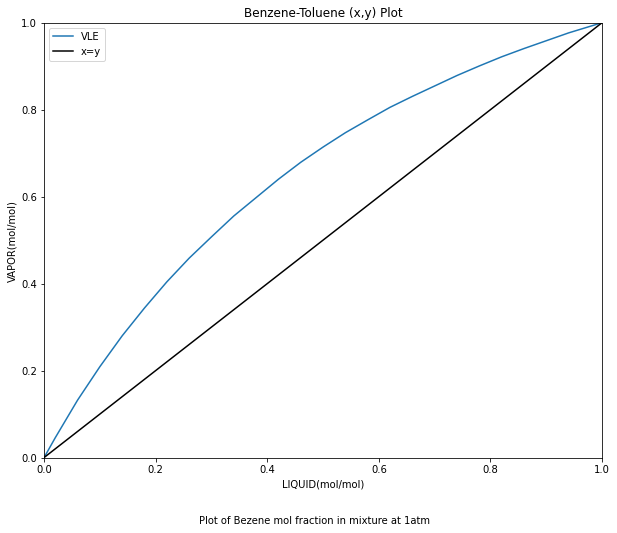

In [ ]:
#Plot initial graph
title = 'Benzene-Toluene (x,y) Plot'
caption = 'Plot of Bezene mol fraction in mixture at 1atm'
x = vle_data['liquid']
y = vle_data['vapor']

plot_mt(x,y,title,caption)

The system displays a positive deviation from Raoult's law (i.e. the attractive forces between molecules of bezene and toluene are weaker than the attractive forces between molecules in the pure components.

## Rectification Section Operating Line
___

The operating line for the rectification section is constructed as follows:

* A vertical line is drawn from the x-axis to the ideal equilibrium line(x = y) at point $x_D$ (the desired distillate composition).

* A line with slope $R/(R+1)$ is then drawn from this instersection point(where R is the reflux ratio).

`R is the ratio of reflux flow (L) to distillate flow (D).`

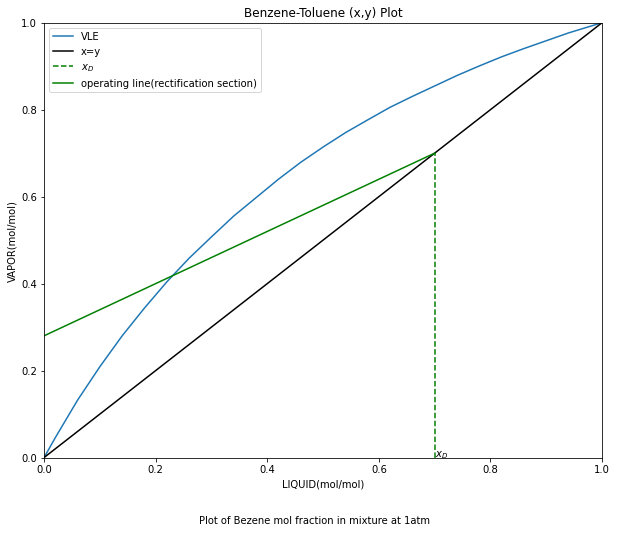

In [ ]:
#Desired top product composition
x_D = 0.7
#Reflux ratio
R = 1.5

plot_mt(x,y,title,caption,x_D,R)

## Stripping Section Operating Line
___

The stripping section operating line is constructed in similar manner:

* A vertical line is drawn from the x-axis to the equilibrium line(x = y) at point $x_B$ (the desired **bottoms** composition).

* A line with slope $L_s/V_s$ (mol/mol) is then drawn from this instersection point(where $L_s$ is the liquid rate down the stripping section and $V_s$ is the vapor rate through the stripping section).

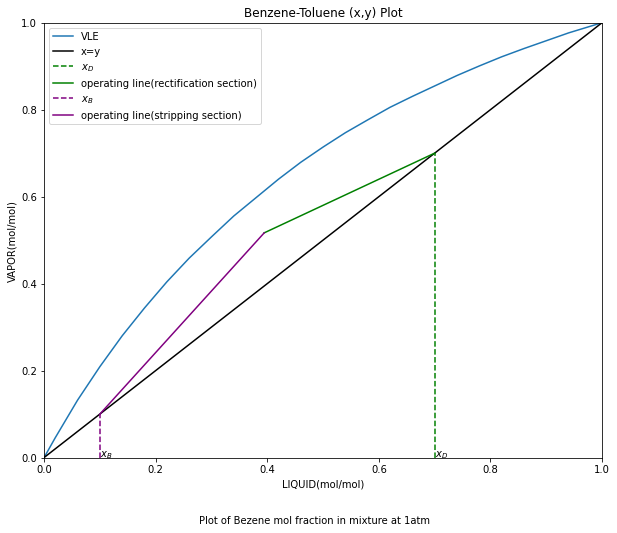

In [ ]:
#Desired top product composition
x_B = 0.1
#L/V
L_V = 1.415


plot_mt(x,y,title,caption,x_D,R,x_B,L_V)

## Determining theoretical number of stages
___

<p align = justify>By plotting "steps" between the operating lines of the rectifying and stripping sections and the equilibrium line, we are solving a mass balance and an equilibrium problem.
the equilibrium between a condensing vapor and evaporating liquid on each stage is represented by the equilibrium line and the mass balance between the fluids passing through each stage in the rectification/stripping section is represented by the operating lines of each section.</p>

Approximately 5 ideal stages including the partial reboiler.
Ideal feed stage = 2
For the feed to be a saturated liquid, feed needs to have x_F = 0.39.
Current feed quality = 4.227911646586347


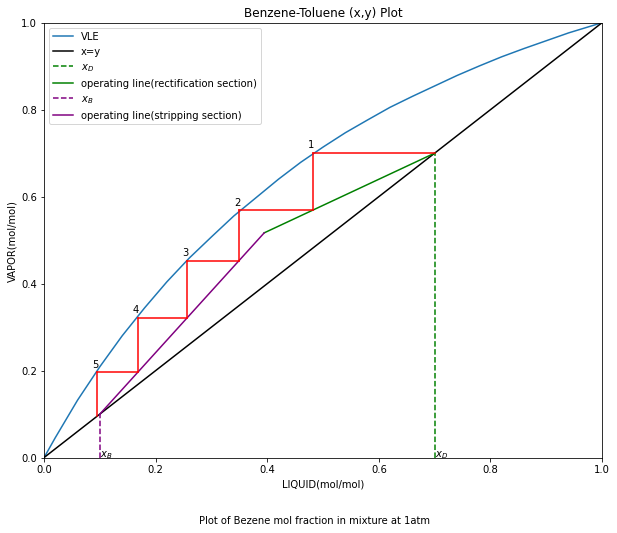

In [ ]:
plot_mt(x,y,title,caption,x_D,R,x_B,L_V,plot_stages = True,summary = True)

In systems with a partial reboiler and total condenser, the required number of trays (as opposed to stages) is one less than the number of stages since the graphical construction includes the contribution of the reboiler in carrying out the separation.

## The Feed Line (q-line)
___

The feed will not be present as a saturated liquid if the feed composition is such that it does not coincide with the intersection of the operating lines. The condition of the feed can be deduced by the slope of the feed line, which is drawn between the intersection of the operating lines, and where the feed composition lies on the diagonal line.

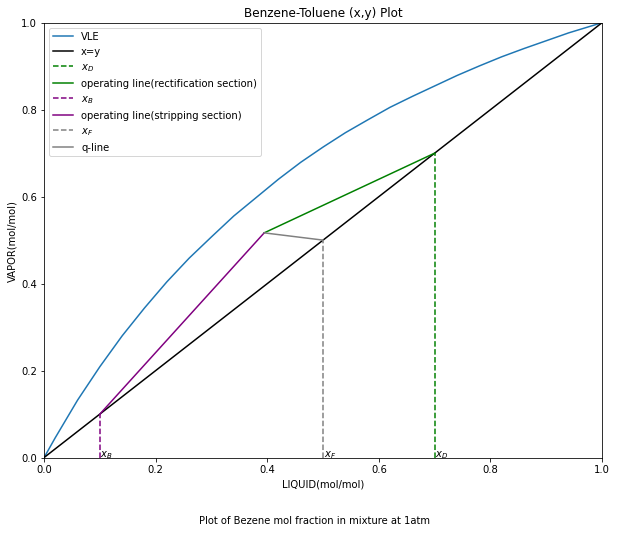

In [ ]:
x_F = 0.5
plot_mt(x,y,title,caption,x_D,R,x_B,L_V,x_F,plot_stages = False)

Depending on the state of the feed, the feed lines will have different slopes(as shown below). 

|q|feed|
|:---:|:---:|
|<0|superheated vapor|
|0|saturated vapor|
|0 $\rightarrow$ 1|two phase mixture|
|1|saturated liquid|
|>1|subcooled liquid|

## Interactive plot
___

In [ ]:
#Click "Run Interact" after making changes to update plot
w = interactive(plot_mt,{'manual': True},
         vle_x = fixed(x),vle_y = fixed(y),title = fixed(title), caption = fixed(caption),
         plot_stages = (False), summary = (False),
         L_V = FloatSlider(min = 1.0,max = 5,value = 1.4, description = 'L/V'),
         R = FloatSlider(min = 0.0,max = 5,value = 3, description = 'Reflux ratio'),
         x_D =  FloatSlider(min = 0.0,max = 1.0,value = 0.9, description = 'Distillate'),
          x_B = FloatSlider(min = 0.0,max = 1.0,value = 0.1, description = 'Bottom'),
           x_F = FloatSlider(min = 0.0,max = 1.0,value = 0.4,description = 'feed'),
           
         );

box_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='flex-start')
button_box = Box([w.children[0],w.children[1],w.children[2],w.children[3],w.children[4],w.children[5],w.children[6],w.children[7]], layout = box_layout)
figure_box = Box([w.children[-1]])
main_box = Box([figure_box,button_box],layout = Layout(align_items = 'flex-start'))
main_box

Box(children=(Box(children=(Output(),)), Box(children=(FloatSlider(value=0.9, description='Distillate', max=1.…